In [7]:
import mne
import matplotlib.pyplot as plt
import os
from pathlib import Path
import shutil

In [8]:
notebook_dir = Path.cwd()

data_dir = notebook_dir.parent / "data"
data_dir.mkdir(exist_ok=True)

print("Downloading MNE sample dataset...")
data_path = mne.datasets.sample.data_path(verbose=True)

raw_src = data_path / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

raw_dest = data_dir / 'sample_audvis_raw.fif'

if not raw_dest.exists():
    shutil.copy(raw_src, raw_dest)
    print(f"Copied to: {raw_dest}")
else:
    print(f"File already exists at: {raw_dest}")

raw = mne.io.read_raw_fif(raw_dest, preload=True)
print(raw)


Copied to: /Users/yibeisita/Documents/neuro-ai-playground/projects/01_egg_read_plot/data/sample_audvis_raw.fif
Opening raw data file /Users/yibeisita/Documents/neuro-ai-playground/projects/01_egg_read_plot/data/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.7 MiB, data loaded>


In [10]:
print("\n--- Info Metadata---")
print(raw.info)
print("\nChannels:", len(raw.ch_names))
print("Sampling Frequency:", raw.info['sfreq'], "Hz")


--- Info Metadata---
<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

Channels: 376
Sampling Frequency: 600.614990234375 Hz


In [12]:
# Filter to EEG-only channels
raw.pick_types(meg=False, eeg=True, eog=True, stim=True)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Raw | sample_audvis_raw.fif, 69 x 166800 (277.7 s), ~90.8 MiB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/yibeisita/Documents/neuro-ai-playground/.venv/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/var/folders/4w/jb7nh9ns51vcx_1p3nn151800000gn/T/ipykernel_17167/3486301692.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


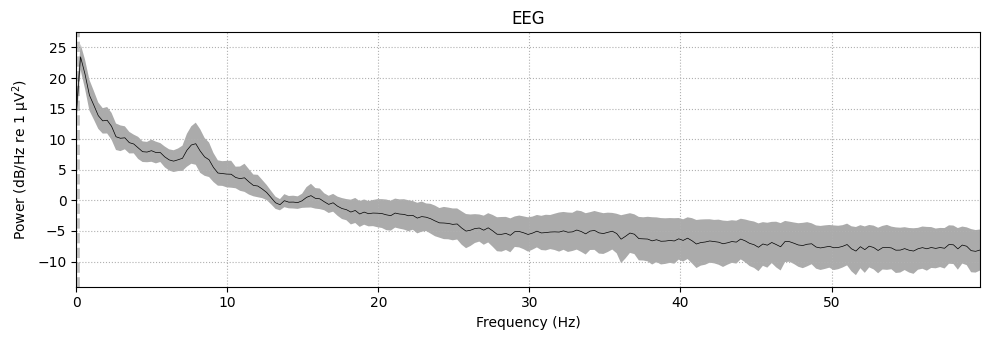

In [13]:
#Plot power spectral density (frequency content)
fig = raw.plot_psd(fmax=60, average=True)
plt.tight_layout()

In [14]:
os.makedirs("../results", exist_ok=True)
fig.savefig("../results/psd_plot.png", dpi=150)

Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


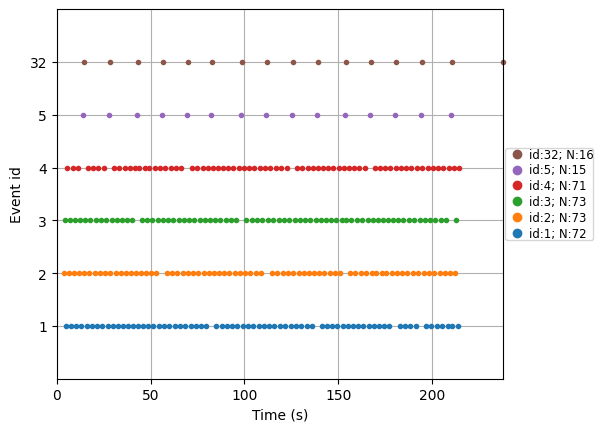

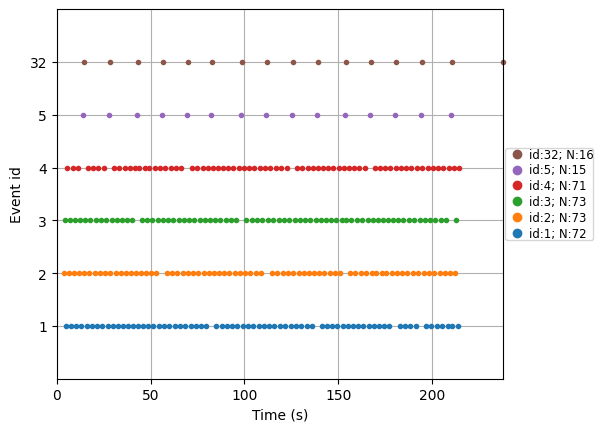

In [15]:
events = mne.find_events(raw, stim_channel='STI 014')
mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)